[0.02300137 0.02219117 0.02141131 0.01862374 0.02809163 0.02016326
 0.02617    0.02985778 0.01548556 0.0197679  0.02756825 0.02415959
 0.02073293 0.02255703 0.02828346 0.0502892  0.02749568 0.02481377
 0.02377225 0.02770956 0.03200032 0.02537568 0.02712891 0.02449685
 0.02215202 0.02587906 0.02755227 0.02892988 0.02659466 0.02848724
 0.02593686 0.0262914  0.02818914 0.03052504 0.02952391 0.03253339
 0.03256731 0.0308876  0.02798479 0.02805622 0.02746231 0.03015344
 0.02959938 0.03177784 0.03065202 0.03022506 0.03031798 0.03191629
 0.03242976 0.03170443 0.03354614 0.03594631 0.03698156 0.03615854
 0.03871509 0.03907717 0.04112495 0.03898782 0.04245711 0.04167712
 0.04194555 0.03889803 0.03872183 0.0379235  0.03641495 0.03048083
 0.03967236 0.03337671 0.03576059 0.03479868 0.03301483 0.03594214
 0.02168474 0.04421351 0.05393163 0.03085965 0.04443353 0.03885839
 0.03794087 0.049451   0.03105369 0.02776918 0.02634527 0.03411796
 0.03556473 0.05343601 0.04308602 0.03704706 0.04706256 0.0482

/home/pzinemanas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


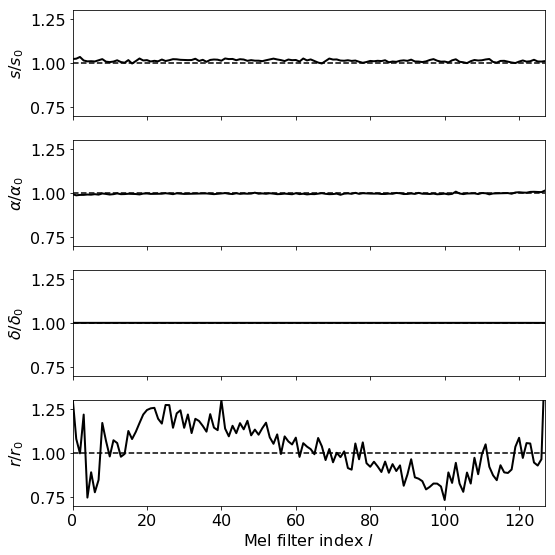

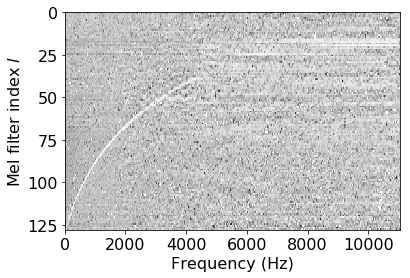

/home/pzinemanas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in log


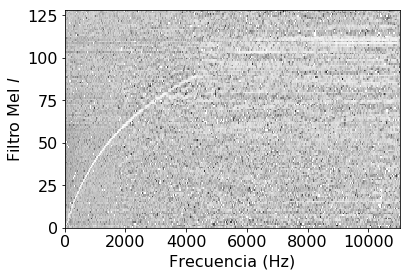

/home/pzinemanas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in log


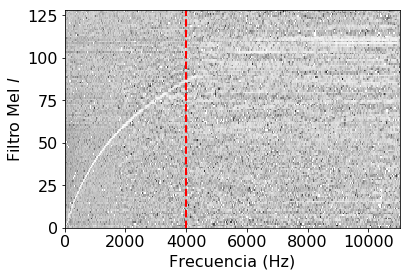

In [2]:
import numpy as np
import os
import librosa
#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'family' : 'sans-serif',
        'size'   : 16}

rc('font', **font)
import sys

from params import *

T = 0.06 * sr / float(audio_hop)
b = (np.sqrt(1 + 4* T**2) - 1) / (2 * T**2)

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(8,8))
filters = np.load("filters.npy")
bs = np.load("b.npy")
alphas = np.load("alpha.npy")
deltas = np.load("delta.npy")
rs = np.load("r.npy")

ylim = [0.7,1.3]
lw = 2
#plt.subplot(4,1,1)
#ax[0].set_title('PCEN parameters after training')
ax[0].plot(bs/b,lw=lw,color='k')
ax[0].plot(np.ones(mel_bands),'k--')
ax[0].set_ylabel('$s/s_0$')
ax[0].set_ylim(ylim)
#ax[0].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[1].plot(alphas/alpha2,lw=lw,color='k')
ax[1].plot(np.ones(mel_bands),'k--')
ax[1].set_ylabel(r'$\alpha/\alpha_0$')
ax[1].set_ylim(ylim)
#ax[1].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[2].plot(deltas/delta,lw=lw,color='k')
ax[2].plot(np.ones(mel_bands),'k--')
ax[2].set_ylabel('$\delta/\delta_0$')
ax[2].set_ylim(ylim)
#ax[2].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[3].plot(rs/r,lw=lw,color='k')
ax[3].plot(np.ones(mel_bands),'k--')
ax[3].set_ylabel('$r/r_0$')
#ax[3].yaxis.set_major_locator(plt.MaxNLocator(3))
ax[3].set_xlim([0,127])
ax[3].set_ylim(ylim)
#ax[3].set_xlabel("Canal $l$")
ax[3].set_xlabel("Mel filter index $l$")
plt.tight_layout()

plt.savefig('parametros_pcen.eps',dpi=200, bbox_inches='tight', pad_inches = 0.1)
#plt.show()


#plt.plot(rnn/b,lw=lw,color='k',label="$s$")
#plt.plot(pcen[0]/alpha2,lw=lw,color='k',label="r'$\alpha$'")
#plt.plot(pcen[1]/delta,lw=lw,color='k',label="$\delta$")
#plt.plot(pcen[2]/r,lw=lw,color='k',label="$r$")
#plt.legend()
#plt.show()


#conv1 = librosa.pcen(conv1,sr=sr, hop_length=audio_hop, gain=0.8, bias=10, power=0.25, time_constant=0.06)

c= filters[:,0]

W = librosa.filters.mel(sr,n_fft,mel_bands,fmax=fmax,htk=True);
W = W**2 #para ser consistentes

print(np.linalg.norm(filters,axis=0))

print(np.linalg.norm(W,axis=1))
print(np.amax(W,axis=1))
freqs = librosa.core.mel_frequencies(n_mels=mel_bands, fmin=0.0, fmax=fmax, htk=True)
freqs = freqs[1:-2]

print(freqs[80])

#N,_,N_filters = conv1.shape

#conv1=np.squeeze(conv1)
print(filters.shape)
#F = np.abs(np.fft.fft(conv1,axis=0)[:N/2+1])

#plt.figure(figsize=(10,4))
plt.figure()
#plt.imshow(np.log(conv1.T))
plt.imshow(np.log(filters.T),cmap=plt.cm.gist_gray,extent=[0,11025,0,128], aspect="auto") #interpolation='none'
#plt.title("Filtros aprendidos")
#plt.xlabel("Indice de frecuencia $k$")
#plt.ylabel("Indice de filtro $l$")
#plt.title("Filters after training")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Mel filter index $l$")
plt.gca().invert_yaxis()
#plt.colorbar()
plt.savefig('filters.eps',dpi=200, bbox_inches='tight', pad_inches = 0.1)
plt.show()
plt.close()

plt.figure()
plt.imshow(np.log(filters.T),cmap=plt.cm.gist_gray,extent=[0,11025,128,0], aspect="auto") #interpolation='none'
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Filtro Mel $l$")
plt.gca().invert_yaxis()
plt.savefig('filters_presentation.eps',dpi=200, bbox_inches='tight', pad_inches = 0.1)
plt.show()
plt.close()

plt.figure()
plt.plot([4000,4000],[0,128],'r--',linewidth=2.0)
plt.imshow(np.log(filters.T),cmap=plt.cm.gist_gray,extent=[0,11025,128,0], aspect="auto") #interpolation='none'
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Filtro Mel $l$")
plt.gca().invert_yaxis()
plt.savefig('filters_presentation_line.eps',dpi=200, bbox_inches='tight', pad_inches = 0.1)
plt.show()
plt.close()